# Block Release

This notebook contains the skeleton of the code to be used for the tasks.

## Imports

In [1]:
import pandas as pd
import requests

## Locations

In [2]:
# coordinates are latitude, longitude pairs
LOCATION_UNIVERSITY_PARK = (52.93726647677705, -1.1959384006396074)
LOCATION_JUBILEE_CAMPUS = (52.95232635429298, -1.1862643609249397)
LOCATION_NOTTINGHAM_CITY_CENTRE = (52.953, -1.149)

## API

You will need to add more API URLs here as needed to complete the stories.

In [9]:
API_STREET_CRIME = "https://data.police.uk/api/crimes-street/"

## Crimes Near University Park Campus

Example function which calculates the number of crimes within 1 mile of University Park campus.

In [16]:
# GA: The story required getting values without location, but it doesn't seem like the API works for that
# So I just did it for within 1 mile of nottingham

def count_crimes_within_1_mile(
    lat: float, lon: float, year: int, month: int, cat: str
) -> int:
    """Calculate number of crimes within 1 mile of a location for a date.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        year (int): Year to find crimes.
        month (int): Month of the provided year to find crimes.
        cat (str): category of crime

    Returns:
        int: Count of the crimes
    """
    url = (
        API_STREET_CRIME + f"{cat}?lat={lat}&lng={lon}&date={year}-{month}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        return len(response.json())
    else:
        print(f"Error retrieving data: {response.status_code}")


print(count_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2022, 12, "violent_crime"))

155


In [17]:
violent_count_22 = count_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2022, 12, "violent_crime")
violent_count_21 = count_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2021, 12, "violent_crime")
violent_count_20 = count_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2020, 12, "violent_crime")

In [26]:
data = {"2020" : [violent_count_20], "2021" : [violent_count_21], "2022" : [violent_count_22]}

In [28]:
df = pd.DataFrame.from_dict(data)

In [36]:
df_melt = df.melt()

<AxesSubplot:xlabel='variable'>

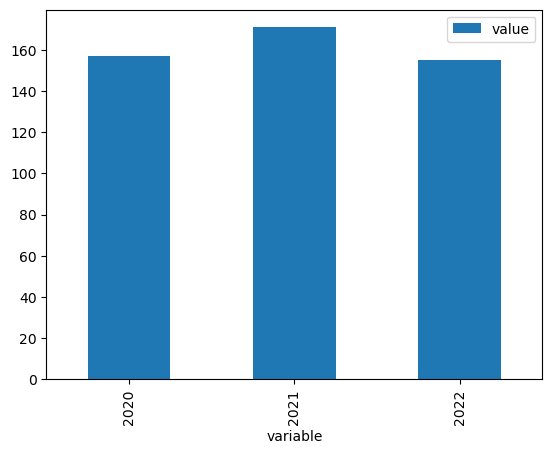

In [42]:
df_melt.plot.bar(x = 'variable', y = 'value')